## Imports

In [ ]:
! pip install web3 dotenv pandas matplotlib

In [5]:
# Importing the Web3 object from web3.py
# dotenv is imported for loading the Gateway environment variable from .env file
# Remember that the Gateway we created has an API key in it (unique identifier for the API caller)

from web3 import Web3
import pandas as pd
from dotenv import load_dotenv
import os

# Loading environment variables from .env file

load_dotenv()
GATEWAY = os.getenv("GATEWAY_URL")

### Validate Gateway URL

In [6]:
def mask_api_key(api_key, visible_chars=32):
     return api_key[:-visible_chars]+ "*" * (len(api_key) - visible_chars) 

print(f'GATEWAY imported as {mask_api_key(GATEWAY)}')

GATEWAY imported as https://mainnet.infura.io/v3/*****************************


## Connecting to Blockchain

In [8]:
w3 = Web3(Web3.HTTPProvider(GATEWAY))
print(f'Is the connection successful?: {w3.is_connected()}') # Should return True

Is the connection successful?: True


## Turn address to checksum

In [9]:
def turn_to_checksum(address: str) -> str:
    """Convert an Ethereum address to its checksum format"""
    if not Web3.is_checksum_address(address): # check if already checksum
        return Web3.to_checksum_address(address) # if not we return checksum address
    return address

ACCOUNT_ADDRESS_RAW = "0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84"
ACCOUNT_ADDRESS = turn_to_checksum(ACCOUNT_ADDRESS_RAW)

## Reading basic transaction data

In [10]:
# Get number of transactions for a given address

def get_transaction_count(address: str) -> int:
    return w3.eth.get_transaction_count(address) # use the get_transaction_count method and pass through the address

get_transaction_count(ACCOUNT_ADDRESS)

5

In [11]:
# Fetch details for a transaction using transaction hash

tx_hash = "0x50f6678c427392209a6a12dfa9bfd258503526ba4e4e2d80b27cf4b7579696a6"
transaction = w3.eth.get_transaction(tx_hash)
print(f'Transaction Details: {transaction}')
print("From:", transaction['from']) # Sender address
print("To:", transaction['to']) # Recipient address
print("Value (ETH):", w3.from_wei(transaction['value'], 'ether')) # Transaction value in ETH
print("Gas Used:", transaction['gas']) # Gas used for the transaction

Transaction Details: AttributeDict({'blockHash': HexBytes('0xf20aa677f9bad06b472f2734570992e6b74e07d0c07e5fba516b8924af5da024'), 'blockNumber': 22227671, 'from': '0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84', 'gas': 21000, 'gasPrice': 951249593, 'maxFeePerGas': 1147752425, 'maxPriorityFeePerGas': 512247655, 'hash': HexBytes('0x50f6678c427392209a6a12dfa9bfd258503526ba4e4e2d80b27cf4b7579696a6'), 'input': HexBytes('0x'), 'nonce': 2, 'to': '0x2083b0413869f7b5b9e0eA27d20CB6dD3535f525', 'transactionIndex': 53, 'value': 4784490000000000, 'type': 2, 'accessList': [], 'chainId': 1, 'v': 0, 'r': HexBytes('0xab6dc09a1d9d85b6127af452f7f42b186d81240751d9022f9b9b198f04ee3139'), 's': HexBytes('0x24df5499c17941337a4d11f1162ac2db049ef467a9418692d21b832ec163a4dd'), 'yParity': 0})
From: 0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84
To: 0x2083b0413869f7b5b9e0eA27d20CB6dD3535f525
Value (ETH): 0.00478449
Gas Used: 21000


In [12]:
def get_tx_details(tx_hash: str) -> dict:
    """Fetches transaction details for a given transaction hash."""
    try:
        transaction = w3.eth.get_transaction(tx_hash)
    except Exception as e:
        print(f"Error fetching transaction details: {e}")
        return {}
    
    return {
        "from": transaction['from'],
        "to": transaction['to'],
        "value (ETH)": w3.from_wei(transaction['value'], 'ether'),
        "gas used": transaction['gas']
    }
    
get_tx_details("0x34fcc447050e420b0a397d0de36f699e27a86ef0f5f28a6932c0f9b8247a51c4")

{'from': '0x2083b0413869f7b5b9e0eA27d20CB6dD3535f525',
 'to': '0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84',
 'value (ETH)': Decimal('0.01'),
 'gas used': 21000}

## Exploring block data

In [13]:
# Checking the latest block number

latest_block = w3.eth.get_block('latest')  

print("Block Number:", latest_block['number'])  
print("Block Hash:", latest_block['hash'].hex())  
print("Transactions in Block:", len(latest_block['transactions']))
print("baseFeePerGas:", latest_block['baseFeePerGas'])

Block Number: 23238627
Block Hash: 1e596f0421fa11287b174c2ec9dc901a76810b748c512395707d12232a1ce3f0
Transactions in Block: 261
baseFeePerGas: 370906209


## Token Balance

In [14]:
# Ether Balance

raw_balance = w3.eth.get_balance(ACCOUNT_ADDRESS)
normalized_balance = w3.from_wei(raw_balance, 'ether')

print(f"Ether Balance for {ACCOUNT_ADDRESS}: {normalized_balance} ETH")

Ether Balance for 0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84: 0.003843781825617197 ETH


In [15]:
# Token Balance

BINANCE_ACCOUNT_ADDRESS_RAW = "0xe1940f578743367F38D3f25c2D2d32D6636929B6"
BINANCE_ACCOUNT_ADDRESS = turn_to_checksum(BINANCE_ACCOUNT_ADDRESS_RAW)

USDC_ADDRESS = "0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48" # Ethereum USDC Address
ERC20_ABI = [
    {
        "constant": True,
        "inputs": [{"name": "_owner", "type": "address"}],
        "name": "balanceOf",
        "outputs": [{"name": "balance", "type": "uint256"}],
        "payable": False,
        "stateMutability": "view",
        "type": "function"
    },
    {
        "constant": True,
        "inputs": [],
        "name": "totalSupply",
        "outputs": [
            {
                "name": "",
                "type": "uint256"
            }
        ],
        "payable": False,
        "stateMutability": "view",
        "type": "function"
    },
    {
        "constant": True,
        "inputs": [],
        "name": "decimals",
        "outputs": [
            {
                "name": "",
                "type": "uint8"
            }
        ],
        "payable": False,
        "stateMutability": "view",
        "type": "function"
    },
]

usdc_contract = w3.eth.contract(address=USDC_ADDRESS, abi=ERC20_ABI) # Create contract client to interact with the contract functions
decimals = usdc_contract.functions.decimals().call()
raw_balance = usdc_contract.functions.balanceOf(BINANCE_ACCOUNT_ADDRESS).call() # pass address to balanceOf function
normalized_balance = raw_balance / 10 ** decimals

print(f"USDC Balance for {BINANCE_ACCOUNT_ADDRESS}: {normalized_balance:,.0f} USDC")

USDC Balance for 0xe1940f578743367F38D3f25c2D2d32D6636929B6: 1,399,999,999 USDC


In [16]:
def get_balances(address: str, tokens: list) -> dict:
    """Gets Ether and token balances for a given address."""
    raw_ether_balance = w3.eth.get_balance(address)
    normalized_ether_balance = w3.from_wei(raw_ether_balance, 'ether')

    if tokens:
        balances = {}
        for token in tokens:
            token_contract = w3.eth.contract(address=token, abi=ERC20_ABI)
            raw_balance = token_contract.functions.balanceOf(address).call()
            decimals = token_contract.functions.decimals().call()
            normalized_balance = raw_balance / 10 ** decimals
            balances[token] = normalized_balance
        return {"ether": normalized_ether_balance, "tokens": balances}
    return {"ether": normalized_ether_balance}

get_balances(BINANCE_ACCOUNT_ADDRESS, [USDC_ADDRESS])

{'ether': 0,
 'tokens': {'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48': 1399999999.009477}}

## Filtering Transactions by Address

In [17]:
# First we identify topic0; unique hash for ERC20 transfer events

erc20_transfer_topic = w3.keccak(text="Transfer(address,address,uint256)").hex() # function name and arguments as a hex string
if '0x' not in erc20_transfer_topic:
    erc20_transfer_topic = '0x' + erc20_transfer_topic
erc20_transfer_topic

'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'

In [18]:
def address_to_topic(address: str) -> str:
    """Convert an Ethereum address into a 32-byte topic string"""
    return Web3.to_hex(Web3.to_bytes(hexstr=address).rjust(32, b'\0')) #Ethereum addresses are only 20 bytes long, so we pad with zeros for the API

logs = w3.eth.get_logs({
    "fromBlock": "earliest",
    "toBlock": "latest",
    "address": USDC_ADDRESS,
    "topics": [erc20_transfer_topic, None, address_to_topic(ACCOUNT_ADDRESS)] # Topic 0 is the Transfer event signature, Topic 1 is the sender (null for all), Topic 2 is the recipient
})

print(len(logs), "token transfers found")
print(f'logs: {logs}')

1 token transfers found
logs: [AttributeDict({'removed': False, 'logIndex': 366, 'transactionIndex': 130, 'transactionHash': HexBytes('0xe5f7a61bc1c31a9442a02854f5b941f390b66a0e46a5f48cc490e791f1480e2d'), 'blockHash': HexBytes('0x846ba7b32e8993d9011b3aa928eaca039a495b5b05b7c71e9fc5e77a96f947c2'), 'blockNumber': 22227642, 'address': '0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48', 'data': HexBytes('0x00000000000000000000000000000000000000000000000000000000000f416e'), 'topics': [HexBytes('0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'), HexBytes('0x0000000000000000000000002083b0413869f7b5b9e0ea27d20cb6dd3535f525'), HexBytes('0x00000000000000000000000038979dfdb5d8fd76fad4e797c4660e20015c6a84')]})]


In [19]:
# Decode logs into readable transfers

transfers = []
for log in logs:
    from_addr = "0x" + log["topics"][1].hex()[-40:]  # last 20 bytes as ethereum address is only 20 bytes long
    to_addr   = "0x" + log["topics"][2].hex()[-40:]

    # handle both hexstring or bytes case
    if isinstance(log["data"], bytes):
        value = int.from_bytes(log["data"], byteorder="big")
    else:
        value = int(log["data"], 16) # interpret this string as base-16 (hexadecimal)

    # We can get the timestamp by looking up the block
    block = w3.eth.get_block(log["blockNumber"]) 
    timestamp = block.timestamp

    # We append the transfer details to transfers list
    transfers.append({
        "block": block.number,
        "timestamp": timestamp,
        "tx": log["transactionHash"].hex(),
        "from": Web3.to_checksum_address(from_addr),
        "to": Web3.to_checksum_address(to_addr),
        "value": (value / 10 ** decimals) # normalize value using the decimals
    })

for t in transfers[:5]:  # print first 5
    print(t)

{'block': 22227642, 'timestamp': 1744157015, 'tx': 'e5f7a61bc1c31a9442a02854f5b941f390b66a0e46a5f48cc490e791f1480e2d', 'from': '0x2083b0413869f7b5b9e0eA27d20CB6dD3535f525', 'to': '0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84', 'value': 0.99979}


In [20]:
def get_token_transfers(address: str, token_address: str, from_block: str = "earliest", to_block: str = "latest") -> list:
    """Retreives token transfers for a given address (tokens sent to the recipient)"""
    logs = w3.eth.get_logs({
        "fromBlock": from_block,
        "toBlock": to_block,
        "address": token_address,
        "topics": [erc20_transfer_topic, None, address_to_topic(address)]
    })

    token_contract = w3.eth.contract(address=token_address, abi=ERC20_ABI)
    decimals = token_contract.functions.decimals().call()

    # Decode logs into readable transfers
    transfers = []
    for log in logs:
        from_addr = "0x" + log["topics"][1].hex()[-40:]  # last 20 bytes
        to_addr   = "0x" + log["topics"][2].hex()[-40:]
        hash      = "0x" + log["transactionHash"].hex()

        # handle both hexstring or bytes case
        if isinstance(log["data"], bytes):
            value = int.from_bytes(log["data"], byteorder="big")
        else:
            value = int(log["data"], 16) # interpret this string as base-16 (hexadecimal)

        block = w3.eth.get_block(log["blockNumber"])
        timestamp = block.timestamp

        transfers.append({
            "block": block.number,
            "timestamp": str(pd.to_datetime(timestamp, unit='s')),
            "tx": hash,
            "from": Web3.to_checksum_address(from_addr),
            "to": Web3.to_checksum_address(to_addr),
            "value": (value / 10 ** decimals) # normalize value using the decimals
        })

    return transfers

transfers = get_token_transfers(BINANCE_ACCOUNT_ADDRESS, USDC_ADDRESS)

## Basic data analysis

<Axes: xlabel='timestamp'>

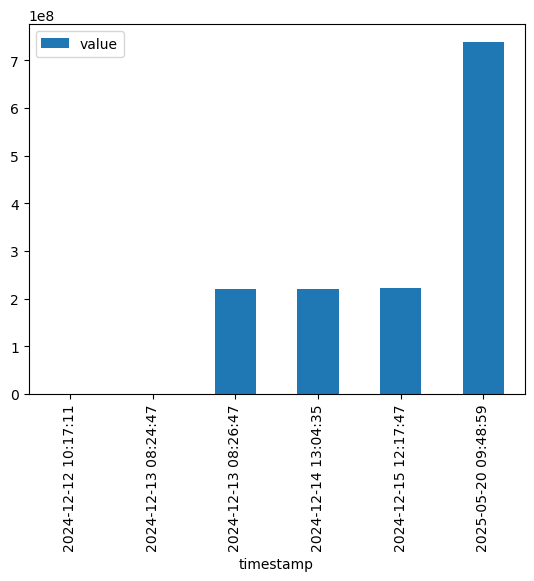

In [21]:
transfers_df = pd.DataFrame(transfers)
transfers_df.set_index('timestamp', inplace=True)
transfers_df.index = pd.to_datetime(transfers_df.index)
transfers_df[['value']].plot(kind='bar')

## ENS API

In [22]:
from ens import ENS # automatically included in web3.py

ns = ENS.from_web3(w3) # client for ENS API

# lookup by domain
domain = "brandynham.eth"
resolved = ns.address(domain) #pass through the domain to the address method
print(f'domain: {domain}')
print(f'address: {resolved}')

# lookup by address
test_address_raw = "0x6cf624aca916066340f0347375c5e87a8c250d38"
test_address = turn_to_checksum(test_address_raw)
domain = ns.name(test_address) # Pass through address to the name method
print(f'address: {test_address}')
print(f'domain: {domain}')

domain: brandynham.eth
address: 0x2083b0413869f7b5b9e0eA27d20CB6dD3535f525
address: 0x6Cf624AcA916066340F0347375c5E87A8C250D38
domain: lll111.eth


## Homework

1. Write a function that:
    - Takes a block number as input
    - Returns the timestamp of when it was mined (human-readable)
    - Hint: We did this in the ERC20 transfer event analysis section
2. Calculate average gas price of last 10 blocks
3. Create a simple whale detector function
    - The function should:
        - Check if a wallet has more than 100 ETH
        - Check if a wallet has more than 1M USDC
        - If either is True, the wallet should be tagged a "Whale" (can simply print "Whale")
        - Optionally, can add more categories (goldfish, dolphin, small whale, large whale, etc.)
    - Test the function with your address or addresses you find on [etherscan.io](https://etherscan.io/token/0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48#balances)
    - Bonus:
        - Create a function that takes in several addresses, checks its category, and appends the address and tag to a dictionary (Address is key, tag is the value)

In [23]:
# Problem 2

N = 10

# Get the latest block number
latest_block = w3.eth.block_number

base_fees = []

for i in range(latest_block, latest_block - N, -1):
    print(f'fetching block {i}') 
    block = w3.eth.get_block(i)
    # You need to fill in the rest

fetching block 23238632
fetching block 23238631
fetching block 23238630
fetching block 23238629
fetching block 23238628
fetching block 23238627
fetching block 23238626
fetching block 23238625
fetching block 23238624
fetching block 23238623
